In [1]:
import pandas as pd
from datetime import datetime, timedelta


# Check if the comment has specific words
# add, or deduct point if it has
def check_word(text):
    
    # the list of words
    laugh = ["草","ワロタ","笑","lamfao","LAMFAO","lol","LOL","lamao","LAMAO","kusa","KUSA","haha","HAHA"]
    others = ["助かる","あっ","おおお","えええ","ええ...","えぇ...","ん？","お？","おめ","ないす","ナイス","うまい","上手い",\
             "似てる","yooo","YOO","yabe","YABE","nice","NICE","pog","POG"]
    ng_words = ["ptpt","tmt","ぐるぐる","おつ","otsu","OTSU","Otsu","bye","BYE"]
    
    # check words
    # if the word has laugh, point is 1
    # if the word has others, point is 1
    # if the word has ng_words, point is -1
    for listed_word in laugh:
        if listed_word in text:
            return 2
        # "w" means laugh in japanese slang
        elif text.endswith(("w","W","ｗ","W")) :
            return 2
    for listed_word in others:
        if listed_word in text:
            return 2
    for  listed_word in ng_words:
        if listed_word in text:
            return -1
    return 0



# read csv

chat = pd.read_csv(input("Enter file name + .csv\n"),sep = ",")

Enter file name + .csv
test.csv


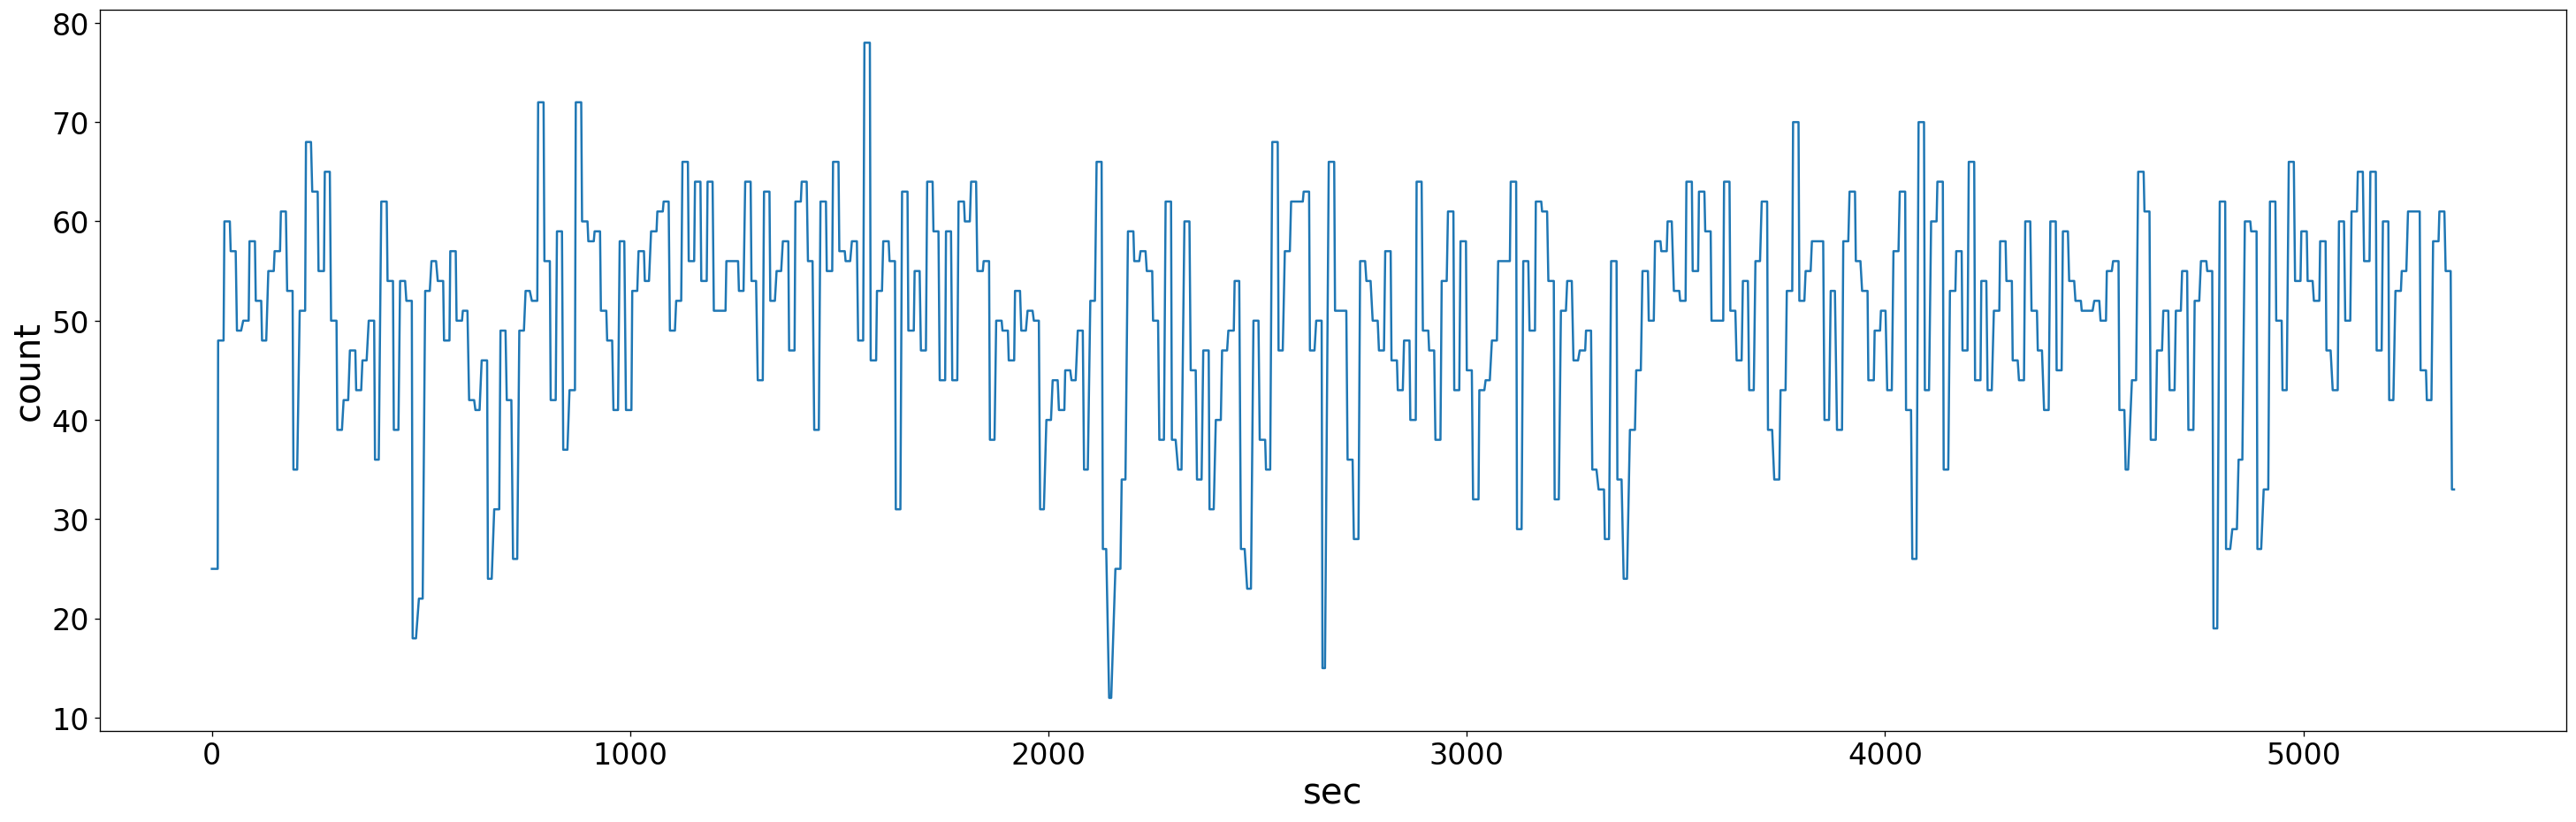

In [2]:
from matplotlib import pyplot as plt

# data processing

#　make time stamp to seconds
chat["seconds"] = [int(h) * 3600 + int(m) * 60 + int(s) for h,m,s in chat['timestamp'].astype(str).str.split(':')]

# Whether a specific word is included or not
chat["include"] = [check_word(text) for text in chat["text"].astype(str)]

#　The number of comments per sencond
seconds = chat["seconds"].value_counts(sort = False).sort_index()

#　The number of points per seconds
total_include = chat.groupby(["seconds"])["include"].agg("sum")

chat_per_seconds = list(zip(seconds.keys(),seconds,total_include))
chat_count =[]

# draw a histogram 

x = []
y = []
per = 15 # set time interval as 15 sec
num_of_chat = 0
total_bonus = 0
count = 0
end = chat_per_seconds[-1][0]

for temp_time,temp_chat,temp_included in chat_per_seconds:
    if temp_time <= per:
        num_of_chat += temp_chat
        total_bonus += temp_included
        count += 1
        
        #　cals remainings
        if temp_time == end:
            for i in range(count):
                x.append(per-15 + i)
                y.append(num_of_chat)
                
            count_list = []
            count_list.append(str(per-15)+"-"+str(temp_time))
            count_list.append(num_of_chat)
            count_list.append(total_bonus)
            chat_count.append(count_list)
            
    else:
        if per == 15:
            for i in range(15):
                x.append(i)
                y.append(num_of_chat)
            count_list = []
            count_list.append(str(0)+"-"+str(per))
            count_list.append(num_of_chat)
            count_list.append(total_bonus)
            chat_count.append(count_list)
                
        else:
            for i in range(count):
                x.append(per-15 + i)
                y.append(num_of_chat)
               
            count_list = []
            count_list.append(str(per-15)+"-"+str(per))
            count_list.append(num_of_chat)
            count_list.append(total_bonus)
            chat_count.append(count_list)
            
        per += 15
        num_of_chat = temp_chat
        total_bonus = temp_included
        count = 0
        
        

plt.figure(figsize=(30, 9),dpi=120)
plt.xlabel('sec',fontsize = 24)
plt.ylabel('count',fontsize = 24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(x,y)
plt.show()



In [3]:
# display recommendation timing

import math


def sigmoid(a):
    e = math.e
    s = 1 / (1 + e**-a)
    return s


recommend = []

for i in range(1,len(chat_count)):
    
    a = chat_count[i][0] 
    b = chat_count[i][1] / chat_count[i-1][1]
    c = sigmoid(b) * chat_count[i][1] + chat_count[i][2]
    d = b * chat_count[i][2] + chat_count[i][1]
    
    recommend.append([a,c])

recommend = sorted(recommend, reverse=True, key=lambda x: x[1])

# there is a time lag between stream and viewer's reaction ±20 seconds
for i in range(1,11):
    print(str(i) + ":" + recommend[i][0] + " ±20 seconds")

1:4335-4350 ±20 seconds
2:4080-4095 ±20 seconds
3:5160-5175 ±20 seconds
4:4125-4140 ±20 seconds
5:1710-1725 ±20 seconds
6:1395-1410 ±20 seconds
7:4290-4305 ±20 seconds
8:4770-4785 ±20 seconds
9:4620-4635 ±20 seconds
10:1410-1425 ±20 seconds
